In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('ggplot')

#        - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
#        - - - Step by step PCA breast_cancer - sklearn Database - - - 
#        - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

### Exploring DataBase

In [37]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [11]:
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = pd.Series(data['target'], name = 'target')

In [12]:
df = pd.concat([X,y], axis = 1)

In [38]:
df.shape

(569, 31)

In [39]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Looking for null values

In [31]:
nans = df.isnull().sum()

In [35]:
nans[nans > 0]

Series([], dtype: int64)

### StandardScaler ( padronização dos dados)

$$
x'_{ij}= \frac{x_{ij}-\bar{X_j}}{s(X_j)} 
$$

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(X)

StandardScaler()

In [25]:
X_pad = scaler.transform(X)

In [26]:
X_pad = pd.DataFrame(X_pad)

### Calculando Matriz de Covariância

\begin{equation}
  S = \left [ \begin{array}{ccccc}
\hat{Var}(x_1) & \hat{Cov}(x_1x_2) & \hat{Cov}(x_1x_3) & \cdots & \hat{Cov}(x_1x_p)\\ 
\hat{Cov}(x_2x_1) &\hat{Var}(x_2)& \hat{Cov}(x_2x_3) & \cdots & \hat{Cov}(x_2x_p)\\ 
\vdots & \vdots & \vdots & \cdots & \vdots  \\
\hat{Cov}(x_px_1) & \hat{Cov}(x_px_2)  & \hat{Cov}(x_px_3)  & \cdots & \hat{Var}(x_p)\\ 
   \end{array} \right ] 
\end{equation}

In [44]:
X_cov = X_pad.cov()

### Definindo autovalores e auto-vetores

In [45]:
from scipy.linalg import eig
eig_vals, eig_vecs = eig(X_cov)

In [46]:
eig_vals

array([1.33049908e+01+0.j, 5.70137460e+00+0.j, 2.82291016e+00+0.j,
       1.98412752e+00+0.j, 1.65163324e+00+0.j, 1.20948224e+00+0.j,
       6.76408882e-01+0.j, 4.77456255e-01+0.j, 4.17628782e-01+0.j,
       3.51310875e-01+0.j, 2.94433153e-01+0.j, 2.61621161e-01+0.j,
       2.41782421e-01+0.j, 1.57286149e-01+0.j, 9.43006956e-02+0.j,
       8.00034045e-02+0.j, 5.95036135e-02+0.j, 5.27114222e-02+0.j,
       4.95647002e-02+0.j, 1.33279057e-04+0.j, 7.50121413e-04+0.j,
       1.59213600e-03+0.j, 6.91261258e-03+0.j, 8.19203712e-03+0.j,
       1.55085271e-02+0.j, 1.80867940e-02+0.j, 2.43836914e-02+0.j,
       2.74877113e-02+0.j, 3.12142606e-02+0.j, 3.00256631e-02+0.j])

In [54]:
#O autovalor representa a variância mostrada (“explicada” or “extraida”)
np.round(np.abs(eig_vals),1)


array([13.3,  5.7,  2.8,  2. ,  1.7,  1.2,  0.7,  0.5,  0.4,  0.4,  0.3,
        0.3,  0.2,  0.2,  0.1,  0.1,  0.1,  0.1,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [57]:
eig_vecs #autovetores - eixos que definem o novo espaço dimensional em relação ao original - plano de dimensão n


array([[ 2.18902444e-01, -2.33857132e-01, -8.53124284e-03,
         4.14089623e-02, -3.77863538e-02,  1.87407904e-02,
         1.24088340e-01,  7.45229622e-03, -2.23109764e-01,
         9.54864432e-02,  4.14714866e-02,  5.10674568e-02,
         1.19672116e-02, -5.95061348e-02, -5.11187749e-02,
         1.50583883e-01, -2.02924255e-01, -1.46712338e-01,
        -2.25384659e-01, -7.02414091e-01,  2.11460455e-01,
        -2.11194013e-01, -1.31526670e-01,  1.29476396e-01,
         1.92264989e-02, -1.82579441e-01,  9.85526942e-02,
        -7.29289034e-02, -4.96986642e-02,  6.85700057e-02],
       [ 1.03724578e-01, -5.97060883e-02,  6.45499033e-02,
        -6.03050001e-01,  4.94688505e-02, -3.21788366e-02,
        -1.13995382e-02, -1.30674825e-01,  1.12699390e-01,
         2.40934066e-01, -3.02243402e-01,  2.54896423e-01,
         2.03461333e-01,  2.15600995e-02, -1.07922421e-01,
         1.57841960e-01,  3.87061187e-02,  4.11029851e-02,
        -2.97886446e-02, -2.73661018e-04, -1.05339342e-

## PCA Utilizando o Sklearn


In [115]:
from sklearn.decomposition import PCA

In [116]:
pca = PCA()

In [117]:
pca.fit(X_pad,y)

PCA()

In [118]:
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [119]:
soma_acul = np.cumsum(pca.explained_variance_ratio_)

In [120]:
soma_acul

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

Text(0, 0.5, 'Variância explicada percentual')

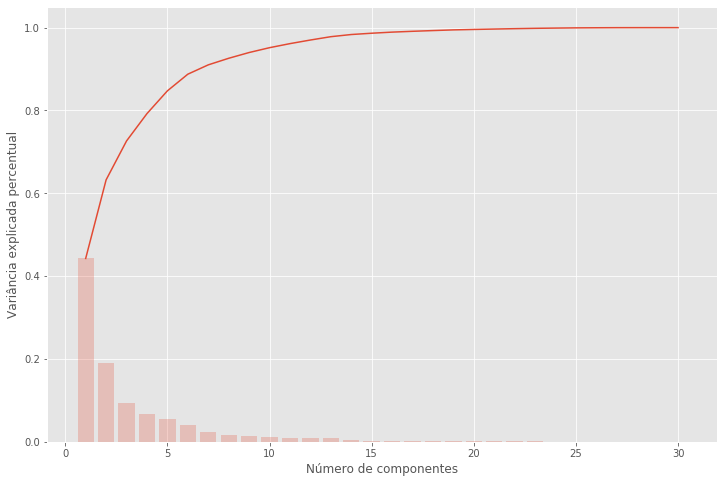

In [121]:
plt.figure(figsize=(12,8))
plt.plot(range(1, 31), soma_acul)
plt.bar(range(1, 31), pca.explained_variance_ratio_, alpha=0.25)
plt.xlabel('Número de componentes')
plt.ylabel('Variância explicada percentual')

In [139]:
soma_acul[soma_acul < 0.95]

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903])

In [140]:
pca = PCA(n_components = len(soma_acul[soma_acul < 0.95])) #can be used PCA(0.95)

In [141]:
pca.fit(X_pad)

PCA(n_components=9)

In [142]:
np.round(pca.explained_variance_ratio_,1)

array([0.4, 0.2, 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. ])

In [143]:
pca.explained_variance_ratio_.sum()

0.9398790323782561

In [144]:
pca.singular_values_

array([86.93235745, 56.90677266, 40.04263937, 33.57058877, 30.62887007,
       26.2104161 , 19.60102663, 16.4680039 , 15.40172546])